<center><h1>Laboratorio 1 Modelamiento - Inteligencia Artificial</h1></center>

Nombres:

- Genesis Heredia
- Kevin Paute Sánchez

Fecha: 13/08/2022

# Importar librerías

In [1]:
# Se realiza la importación de la libreria os
import os
# Se realiza la importación de la libreriaOpenCV
import cv2
# Se realiza la importación de la librerianumpy
import numpy as np
# Se realiza la importación de Image de la libreria PIL
from PIL import Image
# Se realiza la importación de la libreriamatplotlib
import matplotlib.pyplot as plt
# Se realiza la importación de train_test_split de la libreria sklearn
from sklearn.model_selection import train_test_split
# Preparamos el ambiente
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# Se realiza la importación dekeras de la libreria tensorflow
from tensorflow import keras
# Importamos Sequential de la libreria keras
from keras.models import Sequential
# Importamos Conv2D,MaxPooling2D,Dense,Flatten,Dropout de la libreria keras
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
# Importamos BatchNormalization de la libreria tensorflow
from tensorflow.keras.layers import BatchNormalization
# Se realiza la importación de la libreria tensorflow
import tensorflow as tf
# Importamos la libreria visualkeras
import visualkeras

# Data loading and exploration

In [4]:
# Se define la ruta de las imagenes que fueron removidas el fondo
removeBG_img = 'dataset_imagenes_removedBG'
# Se inicializa la variable random_seed con nueve
random_seed = 9
# Obtenemos las categorias
categories = os.listdir(removeBG_img)
# Mostramos las categorias
print("Lista de categorias = ",categories,"\n\nNo. de categorias = ", len(categories))

Lista de categorias =  ['ArroboMercy', 'CevallosJoan', 'GenesisHeredia', 'PauteKevin', 'RivasSelena'] 

No. de categorias =  5


In [11]:
def load_images_and_labels(categories):
    '''
        Método que carga las imágenes y sus etiquetas de las categorías
        de la carpeta removeBG_img.
        Parámetros:
            categories: lista de categorías a cargar
        Retorna:
            images: lista de imágenes de las categorías
            labels: lista de etiquetas de las imágenes   
    '''
    # Se Instancia la lista de imagenes
    img_lst=[]
    # Se Instancia   la lista de etiquetas
    labels=[]
    # Bucle encargado de cargar las imágenes de las categorías
    for index, category in enumerate(categories):
        # Bucle que recorre la ruta de las imagenes
        for image_name in os.listdir(removeBG_img+"/"+category):
            # Leer las imagenes
            img = cv2.imread(removeBG_img+"/"+category+"/"+image_name)
            #  Convierte la imagen a RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            IMAGE_SIZE = (192,192)
            img = cv2.resize(img, IMAGE_SIZE)
            # Convierte la imagen a un array
            img_array = Image.fromarray(img, 'RGB')
            # Agrega la imagen al array de imágenes
            img_lst.append(np.array(img_array))
            # Agrega el indice a las etiquetas
            labels.append(index)
    #Retorna la lista de imagenes y etiquetas
    return img_lst, labels

# Cargamos las imagenes y las etiquetas
images, labels = load_images_and_labels(categories)
# Mostramos la cantidad de imagenes y etiquetas cargadas
print("No. de imagenes cargadas = ",len(images),"\nNo. de etiquetas cargadas = ",len(labels))
# Mostramos el tipo de arreglo creado
print(type(images),type(labels))

No. de imagenes cargadas =  150 
No. de etiquetas cargadas =  150
<class 'list'> <class 'list'>


In [12]:
# convierte la lista de imágenes a un array de numpy
images = np.array(images) 
# convierte la lista de etiquetas a un array de numpy
labels = np.array(labels) 
# muestra las dimensiones de las imágenes y las etiquetas
print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape) 
# muestra el tipo de las imágenes y las etiquetas
print(type(images),type(labels)) 

Images shape =  (150, 192, 192, 3) 
Labels shape =  (150,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


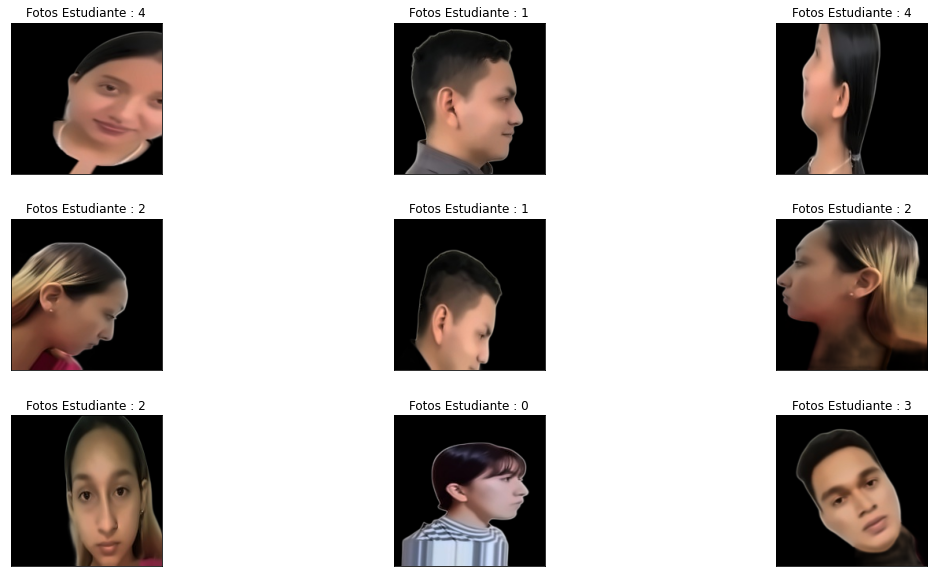

In [14]:
def display_rand_images(images, labels):
    '''
        Método que muestra una imagen aleatoria de cada categoría
        de la carpeta fpath.
        Parámetros:
            images: lista de imágenes de las categorías
            labels: lista de etiquetas de las imágenes   
    '''
    # crea una figura de 19x10
    plt.figure(1 , figsize = (19 , 10)) 
    # contador de imágenes
    n = 0 
    # recorre las categorías de las imágenes y las etiquetas 
    for i in range(9): 
        # incrementa el contador de imágenes
        n += 1 
        # obtiene un número aleatorio entre 0 y el tamaño de la lista de imágenes
        r = np.random.randint(0 , images.shape[0] , 1) 
        # crea una subgráfica de 3x3 con el número de la imagen
        plt.subplot(3 , 3 , n) 
        # ajusta el espaciado entre subgráficas
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3) 
        # muestra la imagen en la subgráfica
        plt.imshow(images[r[0]]) 
         # muestra el título de la imagen con la etiqueta
        plt.title('Fotos Estudiante : {}'.format(labels[r[0]]))
        # oculta los ejes x
        plt.xticks([]) 
         # oculta los ejes y
        plt.yticks([])
    # muestra la gráfica    
    plt.show() 
# muestra las imágenes aleatorias    
display_rand_images(images, labels) 